In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
url = 'https://raw.githubusercontent.com/samtihen/cmpsci5390/main/homework1/xnory.csv'
data = pd.read_csv(url, delimiter=',')

In [5]:
columnNames = list(data.columns) 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       4 non-null      int64
 1   y       4 non-null      int64
 2   xnory   4 non-null      int64
dtypes: int64(3)
memory usage: 224.0 bytes
None


In [4]:
data.describe()

,x,y,xnory
count,4.00000,4.00000,4.00000
mean,0.50000,0.50000,0.50000
std,0.57735,0.57735,0.57735
min,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000
50%,0.50000,0.50000,0.50000
75%,1.00000,1.00000,1.00000
max,1.00000,1.00000,1.00000


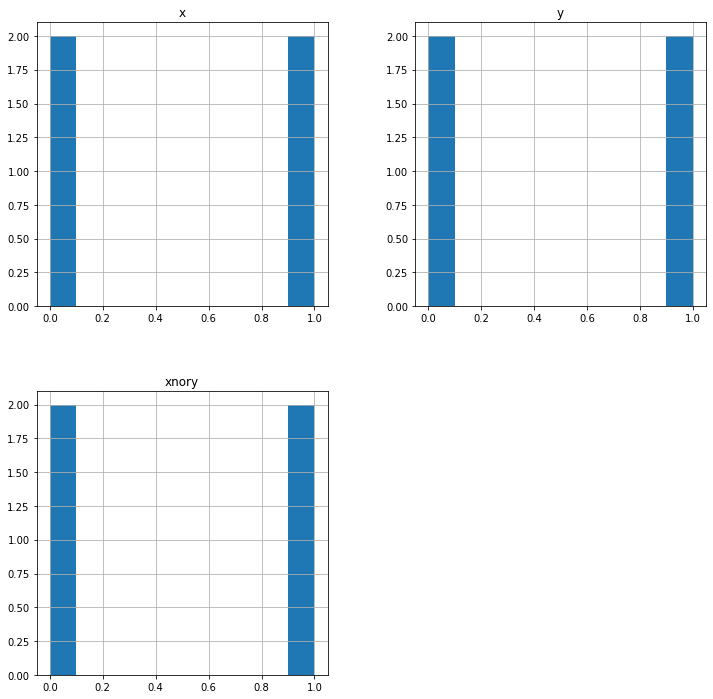

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = ((12,12))
data.hist()
plt.show()

In [7]:
npData = data.to_numpy()

X = npData[:, :]

In [8]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,x,y,xnory
3,1,1,1
1,0,1,0
0,0,0,1
2,1,0,0


In [9]:
number_of_rows = len(data.index)

training_data_row_count = int(number_of_rows * 0.8)
validation_data_row_count = int(number_of_rows * 0.2)

training_data = data.iloc[:training_data_row_count,:] 
validation_data = data.iloc[training_data_row_count:training_data_row_count+validation_data_row_count,:]

print("Shape of new dataframes - {} , {}".format(training_data.shape, validation_data.shape)) 

Shape of new dataframes - (3, 3) , (0, 3)


In [10]:
npTrainingData = data.to_numpy()
XTRAIN = npTrainingData[:, :-1]
YTRAIN = npTrainingData[:, -1]
#The training data is 4 rows, with 3 columns
#The XTRAIN is all the rows, but only the first 2 columns
#The YTRAIN is all the rows, but only the last column (the xnory value)
print(npTrainingData.shape, XTRAIN.shape, YTRAIN.shape)
#print(npTrainingData[0:5])
#print(XTRAIN[0:5])
#print(YTRAIN[0:5])
#len(XTRAIN[3047, :]) #7 columns

(4, 3) (4, 2) (4,)


In [12]:
npValidationData = data.to_numpy()
XVALIDATION = npValidationData[:, :-1]
YVALIDATION = npValidationData[:, -1]
print(npValidationData.shape, XVALIDATION.shape, YVALIDATION.shape)

(4, 3) (4, 2) (4,)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 24        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


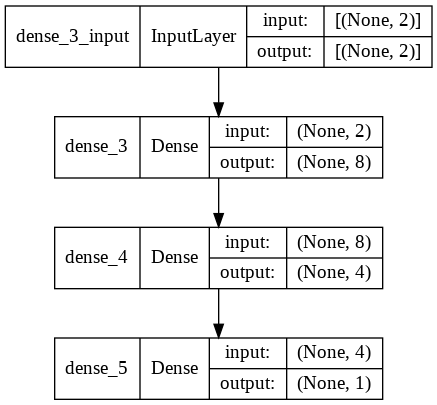

In [19]:
model = Sequential()
model.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation='relu'))
model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.summary()
plot_model(model, show_layer_names=True, show_shapes=True)

In [20]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, epochs = 128, validation_data = (XVALIDATION, YVALIDATION), verbose = 1)

Epoch 1/128
1/1 [==============================] - 1s 1s/step - loss: 0.6849 - accuracy: 0.5000 - val_loss: 0.6839 - val_accuracy: 0.5000
Epoch 2/128
1/1 [==============================] - 0s 28ms/step - loss: 0.6839 - accuracy: 0.5000 - val_loss: 0.6830 - val_accuracy: 0.7500
Epoch 3/128
1/1 [==============================] - 0s 35ms/step - loss: 0.6830 - accuracy: 0.7500 - val_loss: 0.6823 - val_accuracy: 0.7500
Epoch 4/128
1/1 [==============================] - 0s 42ms/step - loss: 0.6823 - accuracy: 0.7500 - val_loss: 0.6816 - val_accuracy: 0.7500
Epoch 5/128
1/1 [==============================] - 0s 28ms/step - loss: 0.6816 - accuracy: 0.7500 - val_loss: 0.6811 - val_accuracy: 0.7500
Epoch 6/128
1/1 [==============================] - 0s 37ms/step - loss: 0.6811 - accuracy: 0.7500 - val_loss: 0.6805 - val_accuracy: 0.7500
Epoch 7/128
1/1 [==============================] - 0s 31ms/step - loss: 0.6805 - accuracy: 0.7500 - val_loss: 0.6800 - val_accuracy: 0.7500
Epoch 8/128
1/1 [=====

In [24]:
print ('Training Data Predictions and Stats:')
print(YTRAIN[:4])
prediction = model.predict(XTRAIN)
print ('Prediction:')
print(prediction[0:4].T)

print ('Accuracy:')
accuracy = model.evaluate(XTRAIN, YTRAIN)

accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Training Data Predictions and Stats:
[1 0 1 0]
Prediction:
[[0.52948564 0.46267927 0.52944213 0.46178004]]
Accuracy:
1/1 [==============================] - 0s 38ms/step - loss: 0.6281 - accuracy: 1.0000
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 1.00
